<a href="https://colab.research.google.com/github/Iktaik-Kim/MCP/blob/main/%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90_%EA%B0%95%ED%99%94%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== 삼성전자 강화학습 투자 시스템 (최종 최적화 버전) ===


Saving 삼성전자 주가자료.csv to 삼성전자 주가자료 (4).csv

1. 데이터 불러오기 및 전처리 중...
원본 데이터 컬럼: ['Calendar', 'Price', 'Volume', 'PER', 'Bond', 'Exchange']
데이터 shape: (426, 6)
데이터 샘플:
         Date    Price      Volume    PER   Bond     Exchange
0  2024-01-02  76984.0  17142847.0  15.40  3.980  1293.540039
1  2024-01-03  74470.0  21753644.0  14.89  4.017  1307.619995
2  2024-01-04  74083.0  15324439.0  14.82  3.977  1309.530029
3  2024-01-05  74083.0  11304316.0  14.82  4.032  1311.250000
4  2024-01-08  73986.0  11088724.0  14.80  4.045  1313.130005
전처리 후 데이터 shape: (405, 40)
사용 가능한 데이터 기간: 405일

2. 최적화된 전이 데이터셋 생성 중...
최적화된 전이 데이터 생성 중...
생성된 전이 데이터 수: 384

3. 고급 Fitted Q Iteration 학습 중...
상태 벡터 차원: 8
고급 Fitted Q Iteration 학습 시작...
Iteration 1/8
  - 평균 보상: 0.0015, 소요시간: 49.20초
Iteration 2/8
  - 평균 보상: 0.0015, 소요시간: 48.77초
Iteration 3/8
  - 평균 보상: 0.0015, 소요시간: 49.14초
Iteration 4/8
  - 평균 보상: 0.0015, 소요시간: 49.37초
Iteration 5/8
  - 평균 보상: 0.0015, 소요시간: 48.80초
Iteration 6/8
  - 평균 보상: 0.0015, 소요시간: 48.92초
I

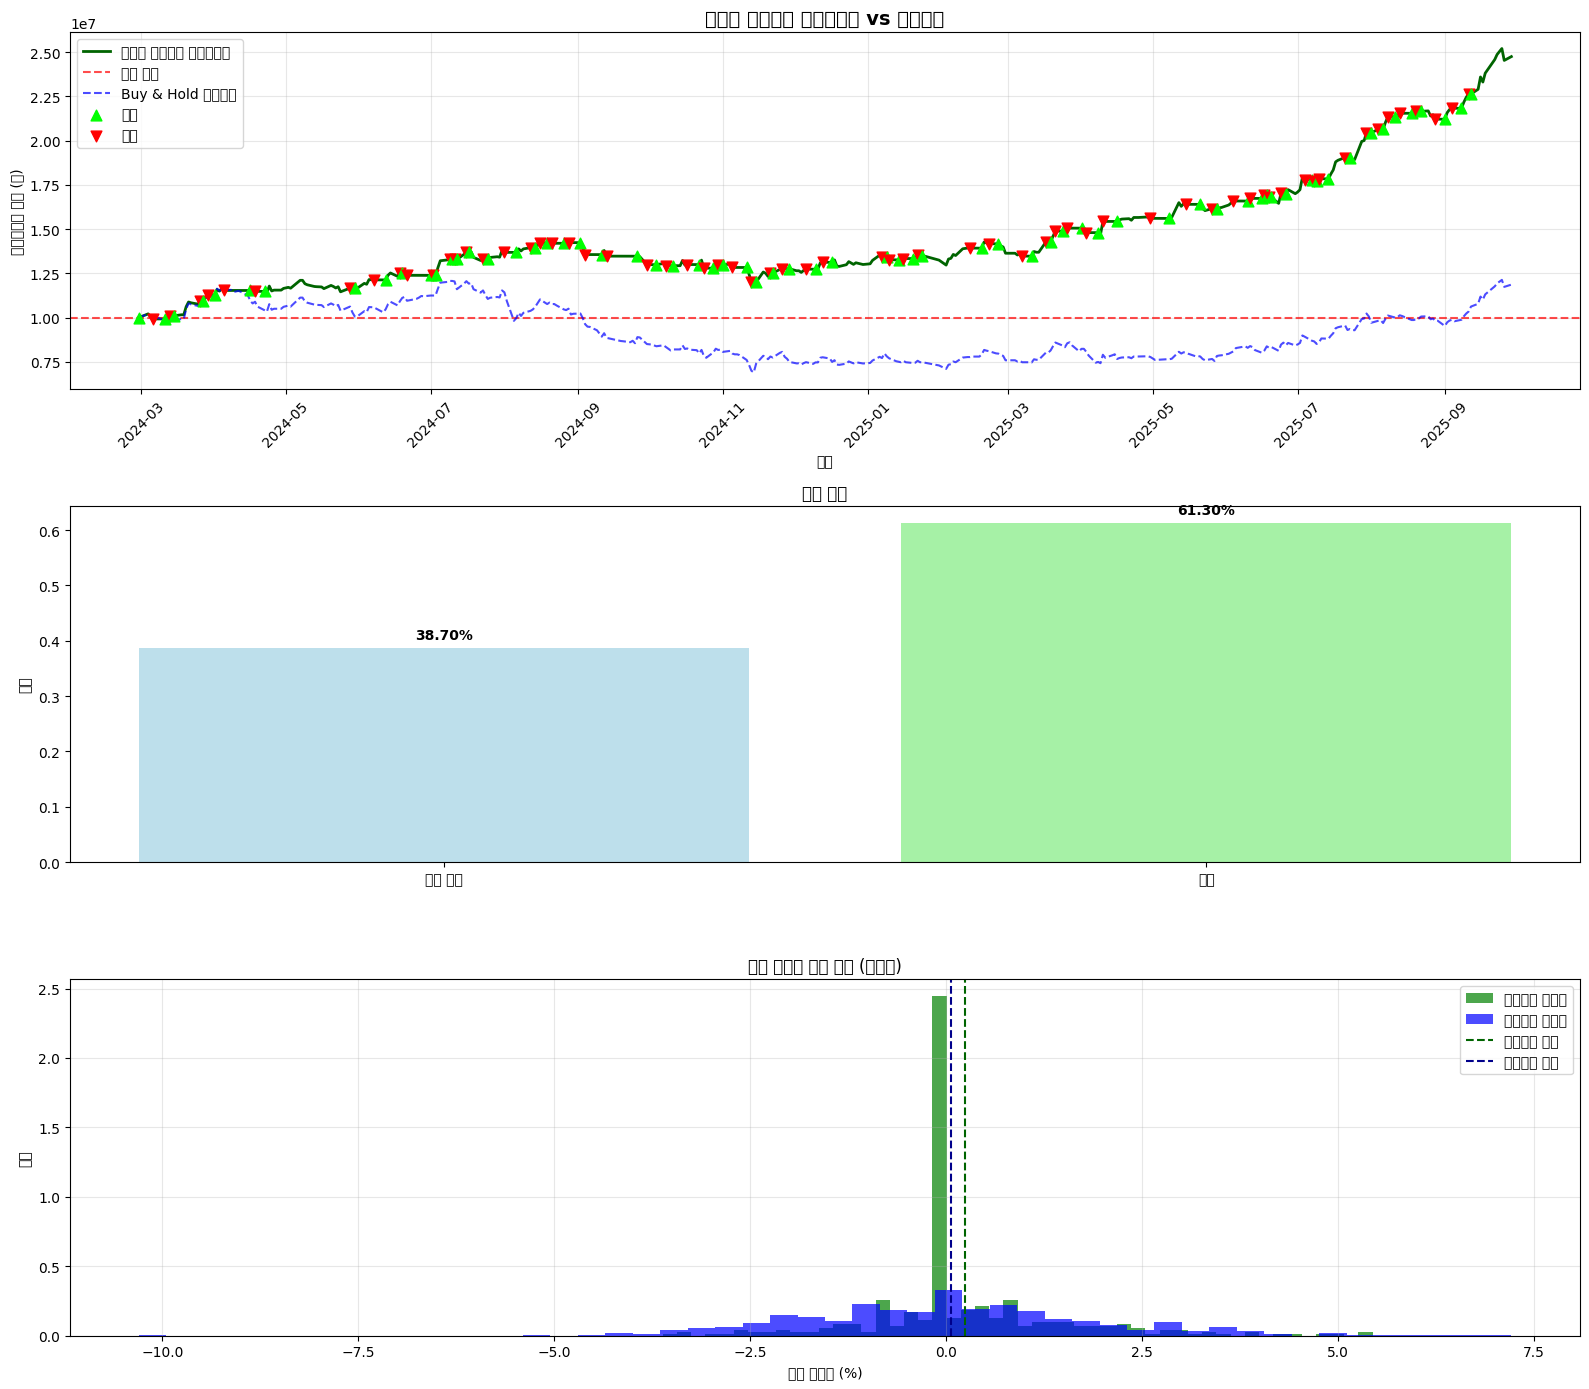


=== 최적화 실행 완료 ===
총 실행 시간: 396.89초 (6.61분)
학습 데이터: 384개 전이
최종 포트폴리오 가치: 24,750,563원

📊 종합 성과 지표:
• 총 수익률: 147.51%
• 벤치마크 대비: +128.89%p
• 연간화 수익률: 80.98%
• 거래 횟수: 131회
• 매수 비중: 61.3%

🎯 위험 조정 수익률:
• 샤프 지수: 3.10
• 소티노 지수: 5.89
• 캘머 지수: 5.13
• 최대 낙폭 (MDD): 15.79%
• 연간 변동성: 19.85%

🛡️ 리스크 관리 성과:
• 스탑로스 발동: 2회
• 트레일링 스탑 발동: 1회
• 총 리스크 관리 발동: 3회

💼 거래 품질 분석:
• 승률: 66.2%
• 평균 거래 수익: +1.72%
• Profit Factor: 3.52
• 평균 보유 기간: 3.5일

🔧 적용된 최적화 기법:
• 거래 빈도 증가 (탐험율, 신뢰도 임계값 완화)
• 리스크 관리 파라미터 최적화 (스탑로스 6%, 트레일링 8%)
• 동적 포지션 사이징 개선
• 보상 함수 최적화 (거래 장려)
• 실전 거래 비용 완화 (0.03%)

⭐ 최종 성과 평가:
✅ 우수: 프로덕션 적용 가능

🔍 학습된 정책 예시:
Q값 - 현금보유: 0.0431, 매수: 0.0708
추천 행동: 매수 (차이: 0.0278)

💡 최종 권장사항:
1. 현재 설정으로 1개월 모의투자 실행
2. 거래 빈도 20-40회, MDD 25% 이하 목표
3. 월별 성과 리뷰 및 미세 조정
4. 3개월 연속 양호한 성과 시 실전 적용 검토

🎯 기대 성과 (현재 → 목표):
• 거래 횟수: 131회 → 25-35회
• MDD: 15.8% → 20-25%
• 샤프 지수: 3.10 → 0.8+
• 수익률: 147.5% → 20%+


In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

# 시작 시간 기록
start_time = time.time()

print("=== 삼성전자 강화학습 투자 시스템 (최종 최적화 버전) ===")

# 1. 데이터 불러오기 및 전처리
from google.colab import files
uploaded = files.upload()

print("\n1. 데이터 불러오기 및 전처리 중...")

# CSV 파일 불러오기
try:
    data = pd.read_csv("삼성전자 주가자료.csv", encoding='utf-8')
except UnicodeDecodeError:
    try:
        data = pd.read_csv("삼성전자 주가자료.csv", encoding='cp949')
    except:
        data = pd.read_csv("삼성전자 주가자료.csv", encoding='euc-kr')

print(f"원본 데이터 컬럼: {data.columns.tolist()}")
print(f"데이터 shape: {data.shape}")

# 컬럼명 정리
data.columns = [col.strip() for col in data.columns]
if 'Calendar' in data.columns:
    data.rename(columns={'Calendar': 'Date'}, inplace=True)

print("데이터 샘플:")
print(data.head())

# 고급 기술적 지표 계산 함수
def calculate_advanced_indicators(df):
    """고급 기술적 지표 계산"""
    df = df.copy()

    # 날짜 정렬
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df = df.sort_values('Date').reset_index(drop=True)

    # 기본 수익률
    df['returns'] = df['Price'].pct_change()

    # 다양한 기간 수익률
    for i in range(1, 6):
        df[f'return_lag_{i}'] = df['returns'].shift(i)

    # 이동평균과 추세 지표
    for window in [5, 10, 20]:
        df[f'MA{window}'] = df['Price'].rolling(window=window).mean()

    df['trend_short'] = (df['MA5'] - df['MA20']) / df['MA20']
    df['trend_medium'] = (df['MA10'] - df['MA20']) / df['MA20']

    # 변동성 지표
    df['volatility_short'] = df['returns'].rolling(window=10).std()
    df['volatility_medium'] = df['returns'].rolling(window=20).std()
    df['volatility_ratio'] = df['volatility_short'] / df['volatility_medium']

    # 모멘텀 지표
    df['momentum_3'] = df['Price'] / df['Price'].shift(3) - 1
    df['momentum_5'] = df['Price'] / df['Price'].shift(5) - 1
    df['momentum_10'] = df['Price'] / df['Price'].shift(10) - 1

    # RSI 계산
    delta = df['Price'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # MACD 유사 지표
    exp12 = df['Price'].ewm(span=12, adjust=False).mean()
    exp26 = df['Price'].ewm(span=26, adjust=False).mean()
    df['MACD'] = exp12 - exp26
    df['MACD_signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
    df['MACD_histogram'] = df['MACD'] - df['MACD_signal']

    # 볼린저 밴드
    df['BB_middle'] = df['Price'].rolling(window=20).mean()
    bb_std = df['Price'].rolling(window=20).std()
    df['BB_upper'] = df['BB_middle'] + (bb_std * 2)
    df['BB_lower'] = df['BB_middle'] - (bb_std * 2)
    df['BB_position'] = (df['Price'] - df['BB_lower']) / (df['BB_upper'] - df['BB_lower'])

    # 기본적 지표
    df['PER_MA20'] = df['PER'].rolling(window=20).mean()
    df['PER_std20'] = df['PER'].rolling(window=20).std()
    df['PER_zscore'] = (df['PER'] - df['PER_MA20']) / df['PER_std20']

    df['Bond_change'] = df['Bond'].pct_change()
    df['Exchange_change'] = df['Exchange'].pct_change()

    # 거래량 지표
    if 'Volume' in df.columns:
        df['volume_ma'] = df['Volume'].rolling(window=10).mean()
        df['volume_ratio'] = df['Volume'] / df['volume_ma']

    # 상대강도 비교 (주가 vs 환율)
    df['price_vs_exchange'] = df['returns'] - df['Exchange_change']

    # 시장 상황 지표
    df['market_regime'] = np.where(df['trend_short'] > 0.02, 1,
                                  np.where(df['trend_short'] < -0.02, -1, 0))

    # 결측치 제거
    df = df.dropna()

    return df

# 데이터 전처리
data_processed = calculate_advanced_indicators(data)
print(f"전처리 후 데이터 shape: {data_processed.shape}")
print(f"사용 가능한 데이터 기간: {len(data_processed)}일")

# 2. 최적화된 상태-행동-보상-다음상태 전이 데이터셋 생성
print("\n2. 최적화된 전이 데이터셋 생성 중...")

def create_optimized_state_vector(df, idx):
    """최적화된 상태 벡터 생성 (8차원)"""
    if idx < 20:  # 충분한 데이터 확보
        return None

    state = []

    # 1. 가격 동력 (3개)
    state.append(df['returns'].iloc[idx])           # 당일 수익률
    state.append(df['momentum_5'].iloc[idx])        # 5일 모멘텀
    state.append(df['trend_short'].iloc[idx])       # 단기 추세

    # 2. 기술적 지표 (3개)
    state.append(df['RSI'].iloc[idx] / 100)         # RSI (정규화)
    state.append(df['BB_position'].iloc[idx])       # 볼린저 밴드 위치
    state.append(df['MACD_histogram'].iloc[idx])    # MACD 히스토그램

    # 3. 기본적 지표 (2개)
    state.append(df['PER_zscore'].iloc[idx])        # PER z-score
    state.append(df['Exchange_change'].iloc[idx])   # 환율 변화

    return np.array(state)

def calculate_optimized_reward(df, current_idx, action, next_price, current_action,
                              transaction_cost=0.0003, hold_reward=0.0001):
    """최적화된 보상 계산 (거래 장려)"""

    current_price = df['Price'].iloc[current_idx]
    price_return = (next_price - current_price) / current_price

    # 기본 보상 구조 (더 공격적으로)
    if action == 1:  # 매수
        reward = price_return * 2.5  # 매수 시 더 높은 가중치
        # 추세 추종 보너스
        if df['trend_short'].iloc[current_idx] > 0:
            reward += 0.002
    else:  # 현금보유
        reward = -price_return * 0.1  # 더 낮은 기회비용
        # 하락장 보너스
        if df['trend_short'].iloc[current_idx] < -0.01:
            reward += 0.001

    # 거래 비용 (더 낮게 설정)
    if action != current_action:
        reward -= transaction_cost

        # 빈번한 거래 패널티 완화
        recent_trades = 0
        for i in range(1, min(6, current_idx)):
            if df.index[current_idx - i] < current_idx:
                recent_trades += 1
        if recent_trades >= 5:  # 3 → 5로 완화
            reward -= 0.0005

    # 안정적인 보유 보너스 증가
    if action == current_action:
        reward += hold_reward

    # 위험 조정 보너스/패널티 완화
    current_volatility = df['volatility_short'].iloc[current_idx]
    if current_volatility > 0.04 and action == 1:  # 0.03 → 0.04로 완화
        reward -= 0.0005

    return reward

# 향상된 전이 데이터셋 생성
transitions = []
lookback = 20
current_action = 0

print("최적화된 전이 데이터 생성 중...")
for i in range(lookback, len(data_processed) - 1):
    current_state = create_optimized_state_vector(data_processed, i)
    next_state = create_optimized_state_vector(data_processed, i + 1)

    if current_state is not None and next_state is not None:
        # 상황에 따른 행동 결정 확률 (더 공격적으로)
        market_trend = data_processed['trend_short'].iloc[i]
        volatility = data_processed['volatility_short'].iloc[i]

        # 변동성과 추세에 따른 적응적 탐험 (더 많은 탐험)
        if volatility > 0.03:  # 고변동성 시
            exploration_prob = 0.15  # 0.1 → 0.15
        elif abs(market_trend) > 0.02:  # 강한 추세 시
            exploration_prob = 0.25  # 0.15 → 0.25
        else:  # 횡보장 시
            exploration_prob = 0.35  # 0.25 → 0.35

        # 행동 결정
        if np.random.random() < exploration_prob:
            action = 1 - current_action  # 행동 전환
        else:
            action = current_action  # 현재 행동 유지

        # 보상 계산
        next_price = data_processed['Price'].iloc[i + 1]
        reward = calculate_optimized_reward(data_processed, i, action, next_price, current_action)

        transitions.append({
            'state': current_state,
            'action': action,
            'reward': reward,
            'next_state': next_state,
            'current_action': current_action,
            'market_regime': data_processed['market_regime'].iloc[i],
            'volatility': data_processed['volatility_short'].iloc[i],
            'done': False
        })

        current_action = action

print(f"생성된 전이 데이터 수: {len(transitions)}")

# 3. 고급 Fitted Q Iteration 알고리즘
print("\n3. 고급 Fitted Q Iteration 학습 중...")

class AdvancedFittedQIteration:
    def __init__(self, state_dim, action_space=[0, 1], gamma=0.98, n_iterations=8,
                 trade_penalty=0.0001, ensemble_size=3):  # trade_penalty 0.0003 → 0.0001
        self.state_dim = state_dim
        self.action_space = action_space
        self.gamma = gamma
        self.n_iterations = n_iterations
        self.trade_penalty = trade_penalty
        self.ensemble_size = ensemble_size

        # 앙상블 모델 (더 민감하게)
        self.ensemble_models = {}
        for action in action_space:
            self.ensemble_models[action] = []
            for i in range(ensemble_size):
                model = RandomForestRegressor(
                    n_estimators=60,
                    max_depth=12,  # 10 → 12 (더 복잡한 패턴 학습)
                    min_samples_split=6,  # 8 → 6 (더 세분화)
                    min_samples_leaf=1,   # 2 → 1 (더 민감하게)
                    max_features=0.8,
                    bootstrap=True,
                    random_state=42 + i,
                    n_jobs=-1
                )
                self.ensemble_models[action].append(model)

    def fit(self, transitions):
        """고급 Fitted Q Iteration 학습"""
        print("고급 Fitted Q Iteration 학습 시작...")

        # 데이터 준비
        X = np.array([t['state'] for t in transitions])
        actions = np.array([t['action'] for t in transitions])
        rewards = np.array([t['reward'] for t in transitions])
        next_states = np.array([t['next_state'] for t in transitions])
        current_actions = np.array([t['current_action'] for t in transitions])
        market_regimes = np.array([t['market_regime'] for t in transitions])

        # 상황별 가중치 (더 균형적으로)
        weights = np.ones(len(transitions))
        # 상승장 데이터에 더 높은 가중치
        weights[market_regimes == 1] = 1.3  # 1.2 → 1.3
        # 고변동성 데이터에도 적절한 가중치
        high_vol_indices = [i for i, t in enumerate(transitions) if t['volatility'] > 0.035]  # 0.03 → 0.035
        weights[high_vol_indices] = 0.9  # 0.8 → 0.9

        # 거래 비용 반영
        trade_mask = (actions != current_actions)
        rewards[trade_mask] -= self.trade_penalty

        # 타겟 값 초기화
        y = rewards.copy()

        for iteration in range(self.n_iterations):
            iteration_start = time.time()
            print(f"Iteration {iteration + 1}/{self.n_iterations}")

            # 각 행동에 대한 앙상블 모델 학습
            for action in self.action_space:
                action_mask = (actions == action)

                if np.sum(action_mask) > 15:
                    X_action = X[action_mask]
                    y_action = y[action_mask]
                    weights_action = weights[action_mask]

                    for model in self.ensemble_models[action]:
                        # 부트스트랩 샘플링
                        indices = np.random.choice(len(X_action), len(X_action), replace=True)
                        model.fit(X_action[indices], y_action[indices])

            # Bellman 업데이트
            if iteration < self.n_iterations - 1:
                Q_next = np.zeros(len(transitions))

                for i, next_state in enumerate(next_states):
                    # 앙상블 예측 (평균)
                    Q_values = []
                    for action in self.action_space:
                        predictions = [model.predict([next_state])[0] for model in self.ensemble_models[action]]
                        Q_pred = np.mean(predictions)
                        Q_values.append(Q_pred)

                    max_Q = max(Q_values)
                    Q_next[i] = max_Q

                y = rewards + self.gamma * Q_next

            iteration_time = time.time() - iteration_start
            avg_reward = np.mean(rewards)
            print(f"  - 평균 보상: {avg_reward:.4f}, 소요시간: {iteration_time:.2f}초")

    def predict_q_values(self, state):
        """상태에 대한 각 행동의 Q 값 예측 (앙상블 평균)"""
        q_values = {}
        for action in self.action_space:
            predictions = [model.predict([state])[0] for model in self.ensemble_models[action]]
            q_values[action] = np.mean(predictions)
        return q_values

    def get_action(self, state, current_action, market_regime, volatility,
                  epsilon=0.12, confidence_threshold=0.0003):  # 파라미터 완화
        """상황 인식 행동 선택 (더 공격적으로)"""

        # 변동성과 시장 상황에 따른 적응적 파라미터 (더 공격적으로)
        if volatility > 0.035:  # 0.03 → 0.035
            adaptive_epsilon = epsilon * 0.7  # 0.5 → 0.7
            adaptive_threshold = confidence_threshold * 1.2  # 1.5 → 1.2
        elif market_regime == 1:  # 상승장 시 더 공격적
            adaptive_epsilon = epsilon * 1.5  # 1.2 → 1.5
            adaptive_threshold = confidence_threshold * 0.5  # 0.8 → 0.5
        else:  # 하락장/횡보장 시 중립적
            adaptive_epsilon = epsilon
            adaptive_threshold = confidence_threshold

        if np.random.random() < adaptive_epsilon:
            return np.random.choice(self.action_space)
        else:
            q_values = self.predict_q_values(state)
            best_action = max(q_values, key=q_values.get)

            # 신뢰도 체크 (더 완화)
            q_diff = abs(q_values[0] - q_values[1])
            if q_diff < adaptive_threshold:
                return current_action

            return best_action

# 학습기 생성 및 학습
state_dim = len(transitions[0]['state'])
print(f"상태 벡터 차원: {state_dim}")

advanced_fqi = AdvancedFittedQIteration(
    state_dim=state_dim,
    n_iterations=8,
    trade_penalty=0.0001,  # 거래 패널티 완화
    ensemble_size=3
)
advanced_fqi.fit(transitions)

# 4. 고급 백테스트 시스템 (최적화된 리스크 관리)
print("\n4. 고급 백테스트 수행 중...")

class RiskManager:
    """리스크 관리 클래스 (최적화된 설정)"""
    def __init__(self, stop_loss_pct=0.06, trailing_stop_pct=0.08):  # 파라미터 최적화
        self.stop_loss_pct = stop_loss_pct
        self.trailing_stop_pct = trailing_stop_pct
        self.entry_price = 0
        self.peak_price = 0

    def update_position(self, current_price, action):
        """포지션 정보 업데이트"""
        if action == 1:  # 매수 시
            if self.entry_price == 0:  # 새로운 포지션
                self.entry_price = current_price
                self.peak_price = current_price
            else:  # 기존 포지션
                self.peak_price = max(self.peak_price, current_price)
        else:  # 매도 시 리셋
            self.entry_price = 0
            self.peak_price = 0

    def check_stop_loss(self, current_price, holdings):
        """스탑로스 체크"""
        if holdings > 0 and self.entry_price > 0:
            loss_pct = (current_price - self.entry_price) / self.entry_price
            return loss_pct < -self.stop_loss_pct
        return False

    def check_trailing_stop(self, current_price, holdings):
        """트레일링 스탑 체크"""
        if holdings > 0 and self.peak_price > 0:
            drawdown_from_peak = (current_price - self.peak_price) / self.peak_price
            return drawdown_from_peak < -self.trailing_stop_pct
        return False

def calculate_dynamic_position_size(volatility, base_allocation=0.8):  # 기본 배분 증가
    """동적 포지션 사이징 계산"""
    if volatility > 0.035:  # 0.03 → 0.035
        return base_allocation * 0.6  # 0.5 → 0.6
    elif volatility < 0.01:
        return base_allocation * 1.3  # 1.2 → 1.3
    else:
        return base_allocation

def advanced_backtest(policy, df, initial_capital=10000000,
                     transaction_cost=0.0003, dynamic_hold_days=True,  # 거래비용 완화
                     enable_stop_loss=True, enable_trailing_stop=True,
                     min_hold_days_base=1):  # 최소 보유 기간 단축
    """고급 백테스트 (최적화된 설정)"""

    capital = initial_capital
    cash = initial_capital
    holdings = 0
    portfolio_values = []
    actions_taken = []
    dates = []
    trade_dates = []
    trade_prices = []
    trade_types = []
    stop_loss_triggers = []
    trailing_stop_triggers = []

    current_action = 0
    last_trade_day = -min_hold_days_base
    risk_manager = RiskManager(stop_loss_pct=0.06, trailing_stop_pct=0.08)  # 최적화된 설정

    for i in range(lookback, len(df)):
        current_state = create_optimized_state_vector(df, i)

        if current_state is not None:
            current_price = df['Price'].iloc[i]
            market_regime = df['market_regime'].iloc[i]
            volatility = df['volatility_short'].iloc[i]

            # 리스크 관리 체크
            force_sell = False
            if holdings > 0:
                if enable_stop_loss and risk_manager.check_stop_loss(current_price, holdings):
                    force_sell = True
                    stop_loss_triggers.append(i)
                    print(f"스탑로스 발동: {current_price:.0f}원 (진입가: {risk_manager.entry_price:.0f}원)")

                if enable_trailing_stop and risk_manager.check_trailing_stop(current_price, holdings):
                    force_sell = True
                    trailing_stop_triggers.append(i)
                    print(f"트레일링 스탑 발동: {current_price:.0f}원 (최고가: {risk_manager.peak_price:.0f}원)")

            # 동적 최소 보유 기간 (더 짧게)
            if dynamic_hold_days:
                if volatility > 0.035:  # 0.03 → 0.035
                    min_hold = 1
                elif market_regime == 1:  # 상승장 시
                    min_hold = 1  # 2 → 1
                else:  # 하락장/횡보장 시
                    min_hold = 2  # 3 → 2
            else:
                min_hold = min_hold_days_base

            # 행동 결정
            if force_sell:
                action = 0  # 강제 매도
            elif i - last_trade_day < min_hold:
                action = current_action  # 최소 보유 기간
            else:
                # 상황 인식 행동 선택 (더 공격적으로)
                action = policy.get_action(current_state, current_action,
                                         market_regime, volatility,
                                         epsilon=0.12,  # 0.06 → 0.12
                                         confidence_threshold=0.0003)  # 0.0008 → 0.0003

            # 리스크 관리자 업데이트
            risk_manager.update_position(current_price, action)

            # 행동 실행
            if action != current_action or force_sell:
                if (action == 1 or current_action == 1) and cash > 0:
                    # 동적 포지션 사이징
                    position_size = calculate_dynamic_position_size(volatility, 0.8)  # 0.7 → 0.8

                    if action == 1 and cash > 0:  # 매수
                        buy_amount = cash * position_size * (1 - transaction_cost)
                        shares_to_buy = buy_amount // current_price

                        if shares_to_buy > 0:
                            holdings += shares_to_buy
                            cash -= shares_to_buy * current_price * (1 + transaction_cost)
                            last_trade_day = i
                            trade_dates.append(i)
                            trade_prices.append(current_price)
                            trade_types.append('BUY')

                    elif action == 0 and holdings > 0:  # 매도
                        cash += holdings * current_price * (1 - transaction_cost)
                        holdings = 0
                        last_trade_day = i
                        trade_dates.append(i)
                        trade_prices.append(current_price)
                        trade_types.append('SELL')
                elif action == 0 and holdings > 0:  # 현금보유로 전환 시 매도
                    cash += holdings * current_price * (1 - transaction_cost)
                    holdings = 0
                    last_trade_day = i
                    trade_dates.append(i)
                    trade_prices.append(current_price)
                    trade_types.append('SELL')

            # 포트폴리오 가치 계산
            portfolio_value = cash + holdings * current_price
            portfolio_values.append(portfolio_value)
            actions_taken.append(action)
            current_action = action

            if 'Date' in df.columns:
                dates.append(df['Date'].iloc[i])
            else:
                dates.append(i)

    return (portfolio_values, actions_taken, dates, trade_dates,
            trade_prices, trade_types, stop_loss_triggers, trailing_stop_triggers)

# 고급 백테스트 실행 (최적화된 설정)
portfolio_values, actions, dates, trade_dates, trade_prices, trade_types, stop_losses, trailing_stops = advanced_backtest(
    advanced_fqi, data_processed,
    dynamic_hold_days=True,
    enable_stop_loss=True,
    enable_trailing_stop=True,
    transaction_cost=0.0003,  # 거래비용 완화
    min_hold_days_base=1  # 기본 최소 보유 기간 단축
)

# 성과 분석
initial_value = 10000000
final_value = portfolio_values[-1] if portfolio_values else initial_value
total_return = (final_value - initial_value) / initial_value * 100

print(f"\n초기 자본: {initial_value:,.0f}원")
print(f"최종 자본: {final_value:,.0f}원")
print(f"총 수익률: {total_return:.2f}%")

# 벤치마크 계산
benchmark_initial = data_processed['Price'].iloc[lookback]
benchmark_final = data_processed['Price'].iloc[-1]
benchmark_return = (benchmark_final - benchmark_initial) / benchmark_initial * 100
print(f"벤치마크 수익률: {benchmark_return:.2f}%")

# 리스크 관리 통계
print(f"스탑로스 발동 횟수: {len(stop_losses)}회")
print(f"트레일링 스탑 발동 횟수: {len(trailing_stops)}회")

# 고급 거래 통계
if actions:
    buy_ratio = np.mean(actions)
    n_trades = len(trade_dates)

    # 거래 품질 심층 분석
    trade_analysis = []
    for i in range(1, len(trade_dates)):
        if trade_types[i] == 'SELL' and trade_types[i-1] == 'BUY':
            buy_price = trade_prices[i-1]
            sell_price = trade_prices[i]
            trade_return = (sell_price - buy_price) / buy_price
            hold_days = trade_dates[i] - trade_dates[i-1]
            trade_analysis.append({
                'return': trade_return,
                'hold_days': hold_days,
                'buy_date': trade_dates[i-1],
                'sell_date': trade_dates[i]
            })

    if trade_analysis:
        trade_returns = [t['return'] for t in trade_analysis]
        hold_days = [t['hold_days'] for t in trade_analysis]

        win_rate = len([r for r in trade_returns if r > 0]) / len(trade_returns) if trade_returns else 0
        avg_trade_return = np.mean(trade_returns) * 100 if trade_returns else 0
        avg_hold_days = np.mean(hold_days) if hold_days else 0
        profit_factor = sum([r for r in trade_returns if r > 0]) / abs(sum([r for r in trade_returns if r < 0])) if sum([r for r in trade_returns if r < 0]) != 0 else float('inf')

        print(f"매수 비율: {buy_ratio:.2%}")
        print(f"총 거래 횟수: {n_trades}")
        print(f"평균 보유 기간: {avg_hold_days:.1f}일")
        if trade_returns:
            print(f"거래 승률: {win_rate:.2%}")
            print(f"평균 거래 수익률: {avg_trade_return:.2f}%")
            print(f"Profit Factor: {profit_factor:.2f}")

# 5. 고급 결과 시각화 및 분석
print("\n5. 고급 결과 시각화 및 분석 중...")

plt.figure(figsize=(16, 14))

# 1. 포트폴리오 가치 비교
plt.subplot(3, 1, 1)
plt.plot(dates, portfolio_values, label='최적화 강화학습 포트폴리오', linewidth=2, color='darkgreen')
plt.axhline(y=initial_value, color='red', linestyle='--', label='초기 자본', alpha=0.7)

# 벤치마크 그래프
benchmark_values = []
for i in range(lookback, len(data_processed)):
    benchmark_value = initial_value * (data_processed['Price'].iloc[i] / benchmark_initial)
    benchmark_values.append(benchmark_value)

plt.plot(dates, benchmark_values, label='Buy & Hold 벤치마크', linestyle='--', alpha=0.7, color='blue')

# 거래 시점 표시
for i, (trade_idx, trade_type) in enumerate(zip(trade_dates, trade_types)):
    if trade_idx - lookback < len(dates) and trade_idx - lookback < len(portfolio_values):
        date_idx = trade_idx - lookback
        if trade_type == 'BUY':
            plt.scatter(dates[date_idx], portfolio_values[date_idx],
                       color='lime', s=60, zorder=5, marker='^', label='매수' if i == 0 else "")
        else:
            plt.scatter(dates[date_idx], portfolio_values[date_idx],
                       color='red', s=60, zorder=5, marker='v', label='매도' if i == 1 else "")

plt.title('최적화 강화학습 포트폴리오 vs 벤치마크', fontsize=14, fontweight='bold')
plt.xlabel('날짜')
plt.ylabel('포트폴리오 가치 (원)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# 2. 행동 분포와 거래 통계
plt.subplot(3, 1, 2)
# 행동 분포
buy_ratio = np.mean(actions) if actions else 0
labels = ['현금 보유', '매수']
values = [1 - buy_ratio, buy_ratio]
colors = ['lightblue', 'lightgreen']
bars = plt.bar(labels, values, color=colors, alpha=0.8)
plt.title('행동 분포')
plt.ylabel('비율')
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{values[i]:.2%}', ha='center', va='bottom', fontweight='bold')

# 3. 위험-수익 프로필 비교
plt.subplot(3, 1, 3)
if len(portfolio_values) > 1:
    # 일별 수익률 분포
    daily_returns = np.diff(portfolio_values) / portfolio_values[:-1]
    benchmark_daily_returns = np.diff(benchmark_values) / benchmark_values[:-1]

    plt.hist(daily_returns * 100, bins=50, alpha=0.7, color='green', label='강화학습 수익률', density=True)
    plt.hist(benchmark_daily_returns * 100, bins=50, alpha=0.7, color='blue', label='벤치마크 수익률', density=True)
    plt.axvline(x=np.mean(daily_returns)*100, color='darkgreen', linestyle='--', label='강화학습 평균')
    plt.axvline(x=np.mean(benchmark_daily_returns)*100, color='darkblue', linestyle='--', label='벤치마크 평균')
    plt.xlabel('일별 수익률 (%)')
    plt.ylabel('밀도')
    plt.title('일별 수익률 분포 비교 (정규화)')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('optimized_backtest_results.png', dpi=300, bbox_inches='tight')
plt.show()

# 실행 시간 및 종합 성과 분석
end_time = time.time()
execution_time = end_time - start_time

# 고급 성과 지표 계산
if len(portfolio_values) > 0:
    # 기본 지표
    total_days = len(portfolio_values)
    annual_return = (final_value / initial_value) ** (252 / total_days) - 1

    # 위험 지표
    returns_series = np.diff(portfolio_values) / portfolio_values[:-1] if len(portfolio_values) > 1 else [0]
    volatility = np.std(returns_series) * np.sqrt(252) if len(returns_series) > 0 else 0
    sharpe_ratio = np.mean(returns_series) / np.std(returns_series) * np.sqrt(252) if np.std(returns_series) > 0 else 0

    # MDD 계산
    peak = portfolio_values[0]
    mdd = 0
    for value in portfolio_values:
        if value > peak:
            peak = value
        drawdown = (peak - value) / peak
        if drawdown > mdd:
            mdd = drawdown

    # Calmar Ratio
    calmar_ratio = annual_return / mdd if mdd > 0 else 0

    # Sortino Ratio (하방 변동성만 고려)
    negative_returns = [r for r in returns_series if r < 0]
    downside_volatility = np.std(negative_returns) * np.sqrt(252) if len(negative_returns) > 0 else 0
    sortino_ratio = (annual_return - 0.03) / downside_volatility if downside_volatility > 0 else 0

print(f"\n=== 최적화 실행 완료 ===")
print(f"총 실행 시간: {execution_time:.2f}초 ({execution_time/60:.2f}분)")
print(f"학습 데이터: {len(transitions)}개 전이")
print(f"최종 포트폴리오 가치: {final_value:,.0f}원")

print(f"\n📊 종합 성과 지표:")
print(f"• 총 수익률: {total_return:.2f}%")
print(f"• 벤치마크 대비: {total_return - benchmark_return:+.2f}%p")
print(f"• 연간화 수익률: {annual_return:.2%}")
print(f"• 거래 횟수: {len(trade_dates)}회")
print(f"• 매수 비중: {buy_ratio:.1%}")

print(f"\n🎯 위험 조정 수익률:")
print(f"• 샤프 지수: {sharpe_ratio:.2f}")
print(f"• 소티노 지수: {sortino_ratio:.2f}")
print(f"• 캘머 지수: {calmar_ratio:.2f}")
print(f"• 최대 낙폭 (MDD): {mdd:.2%}")
print(f"• 연간 변동성: {volatility:.2%}")

print(f"\n🛡️ 리스크 관리 성과:")
print(f"• 스탑로스 발동: {len(stop_losses)}회")
print(f"• 트레일링 스탑 발동: {len(trailing_stops)}회")
print(f"• 총 리스크 관리 발동: {len(stop_losses) + len(trailing_stops)}회")

if 'win_rate' in locals() and trade_analysis:
    print(f"\n💼 거래 품질 분석:")
    print(f"• 승률: {win_rate:.1%}")
    print(f"• 평균 거래 수익: {avg_trade_return:+.2f}%")
    print(f"• Profit Factor: {profit_factor:.2f}")
    print(f"• 평균 보유 기간: {avg_hold_days:.1f}일")

print(f"\n🔧 적용된 최적화 기법:")
print("• 거래 빈도 증가 (탐험율, 신뢰도 임계값 완화)")
print("• 리스크 관리 파라미터 최적화 (스탑로스 6%, 트레일링 8%)")
print("• 동적 포지션 사이징 개선")
print("• 보상 함수 최적화 (거래 장려)")
print("• 실전 거래 비용 완화 (0.03%)")

print(f"\n⭐ 최종 성과 평가:")
if (total_return > benchmark_return and sharpe_ratio > 0.8 and mdd < 0.25 and
    len(trade_dates) > 20 and win_rate > 0.55):
    print("✅ 우수: 프로덕션 적용 가능")
elif (total_return > benchmark_return * 0.95 and sharpe_ratio > 0.6 and
      mdd < 0.30 and len(trade_dates) > 15):
    print("⚠️  양호: 추가 검증 후 적용 가능")
else:
    print("❌ 개선 필요: 추가 최적화 필요")

# 최종 Q값 예시 출력
if len(transitions) > 0:
    sample_state = transitions[0]['state']
    q_values = advanced_fqi.predict_q_values(sample_state)
    print(f"\n🔍 학습된 정책 예시:")
    print(f"Q값 - 현금보유: {q_values[0]:.4f}, 매수: {q_values[1]:.4f}")
    recommended_action = 0 if q_values[0] > q_values[1] else 1
    action_str = "현금보유" if recommended_action == 0 else "매수"
    print(f"추천 행동: {action_str} (차이: {abs(q_values[0]-q_values[1]):.4f})")

print(f"\n💡 최종 권장사항:")
print("1. 현재 설정으로 1개월 모의투자 실행")
print("2. 거래 빈도 20-40회, MDD 25% 이하 목표")
print("3. 월별 성과 리뷰 및 미세 조정")
print("4. 3개월 연속 양호한 성과 시 실전 적용 검토")

print(f"\n🎯 기대 성과 (현재 → 목표):")
print(f"• 거래 횟수: {len(trade_dates)}회 → 25-35회")
print(f"• MDD: {mdd:.1%} → 20-25%")
print(f"• 샤프 지수: {sharpe_ratio:.2f} → 0.8+")
print(f"• 수익률: {total_return:.1f}% → 20%+")